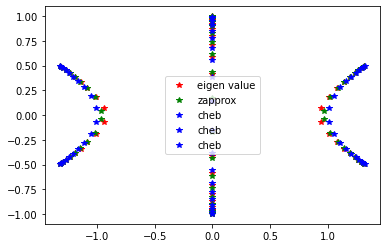

In [3]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt

def difftk(A,k):
  n=len(A)
  d=1
  for i in range(n):
    if(i+1 !=k):
      d = d*(A[k-1]-A[i])
  return(d)

n=60
k=3
m=n
#creating tridiagonal matrix and finding its eigen values using scipy
B=np.zeros((m,m))
for i in range(m-1):
  B[i][i+1]=(-1)**((i+3)%3)
  B[i+1][i]=1
result=sc.eig(B)
e2=result[0]

A=np.zeros((n,n))
for i in range(n-1):
  A[i][i+1]=(-1)**((i+3)%3)
  A[i+1][i] = 1

result=sc.eig(A)
e1=result[0]

plt.plot(e1.real,e1.imag,"*",color="red",label="eigen value")

tnroots=np.zeros(int(n/k),dtype=complex)
for l in range(1,int(n/k)+1):
  tnroots[l-1]=1j*2*np.cos(np.pi/((n/k)+1)*(l))

tnm1roots=np.zeros(int(n/k)-1,dtype=complex)
for l in range(1,int(n/k)):
  tnm1roots[l-1]=1j*2*np.cos(np.pi/(n/k)*(l))

zapprox=[]

#print(zapprox)

for i in range(int(n/k)):
  #print(i)
  zeta=(np.roots([1,0,-1,-tnroots[i]]))
  #print(zeta)
  index=np.argsort(zeta.real)
  #print(index)
  zeta_s=zeta[index]
  #print(zeta_s)
  if(i<=((n/(2*k))-1)):
    tnd=difftk(tnroots,i+1)
    #print(tnd)
    tnm1d =difftk(tnm1roots,i+1)
    #print(tnm1d)
    p1 = tnroots[i]
    p2 = tnm1roots[i]

  if(i>((n/(2*k))-1)):
    tnd =difftk(tnroots,i+1)
    #print(tnd)
    tnm1d =difftk(tnm1roots,i)
    #print(tnm1d)
    p1 =tnroots[i]
    p2 = tnm1roots[i-1]

  zeta = zeta_s[0]
  nr = (p1*tnd + zeta*p2*tnm1d)
  dr = (tnd + zeta*tnm1d)
  tval = nr/dr
  #print(tval)
  #print(i)
  #print(tval[i],i)
  a=[1,0,-1,-tval]
  rootvals=np.roots(a)
  index=np.argsort(rootvals.real)
  rootvals=rootvals[index]
  #print(rootvals)
  #print(zapprox)
  zapprox.append(rootvals[0])#[zapprox,rootvals[0]]
  #print(zapprox)

  zeta = zeta_s[1]
  nr =(p1*tnd + zeta*p2*tnm1d)
  dr =(tnd + zeta*tnm1d)
  tval =nr/dr
  a=[1,0,-1,-tval]
  #for j in tval: 
   # a.append(j)
  rootvals=np.roots(a)
  index=np.argsort(rootvals.real)
  rootvals=rootvals[index]
  zapprox.append(rootvals[1])

  zeta=zeta_s[2]
  nr=(p1*tnd+zeta*p2*tnm1d)
  dr=(tnd+zeta*tnm1d)
  tval=nr/dr
  a=[1,0,-1,-tval]
 # for j in tval: 
  #  a.append(j)
  rootvals=np.roots(a)
  index=np.argsort((rootvals.real))
  rootvals=rootvals[index]
  #print(rootvals)
  zapprox.append(rootvals[2])
#print(np.shape(zapprox))
a=len(zapprox)
zar=[]
zai=[]
for i in range(a):
  zar.append(zapprox[i].real)
  zai.append(zapprox[i].imag)

plt.plot(zar,zai,'*',color="green",label="zapprox")

zcheb=[]
for i in range(int(n/k)):
  zcheb.append(np.roots([1,0,-1,tnroots[i]]))

a=len(zcheb)
zcr=[]
zci=[]
for i in range(a):
  zcr.append(zcheb[i].real)
  zci.append(zcheb[i].imag)

plt.plot(zcr,zci,'*',color="blue",label="cheb")
plt.plot(title="cheb")
plt.legend()
plt.savefig("eigen_values.png")
plt.show()